In [21]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [22]:
#  pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
hepatitis = fetch_ucirepo(id=46)

# data (as pandas dataframes)
data = hepatitis.data.original
data

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


# Informasi Data

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          154 non-null    float64
 4   Antivirals       155 non-null    int64  
 5   Fatigue          154 non-null    float64
 6   Malaise          154 non-null    float64
 7   Anorexia         154 non-null    float64
 8   Liver Big        145 non-null    float64
 9   Liver Firm       144 non-null    float64
 10  Spleen Palpable  150 non-null    float64
 11  Spiders          150 non-null    float64
 12  Ascites          150 non-null    float64
 13  Varices          150 non-null    float64
 14  Bilirubin        149 non-null    float64
 15  Alk Phosphate    126 non-null    float64
 16  Sgot             151 non-null    float64
 17  Albumin         

# Check Missing Value

In [24]:
data.isnull().sum()

Class               0
Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk Phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0
dtype: int64

# Imputasi Missing Value

In [25]:
data.fillna(data.median(), inplace=True)
data.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,61.0,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,61.0,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,61.0,1
3,2,31,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,200.0,4.0,61.0,1


# Drop Data Target

In [26]:
data_fitur = data.drop(columns=['Class'])
data_fitur

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,61.0,1
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,61.0,1
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,61.0,1
3,31,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,200.0,4.0,61.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,85.0,242.0,3.3,50.0,2
151,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,61.0,2
152,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,61.0,2
153,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


# Normalisasi Data

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_fitur)

# Menampilkan ukuran data_scaled
print('Ukuran data_scaled:', data_scaled.shape)

# Menampilkan data_scaled
print('\nData setelah di Normalisasi:')
data_scaled

Ukuran data_scaled: (155, 19)

Data setelah di Normalisasi:


array([[-0.89419175,  2.94745653, -1.01954582, ...,  0.2654787 ,
        -0.02822528, -0.90748521],
       [ 0.70257923, -0.33927557, -1.01954582, ..., -0.5445449 ,
        -0.02822528, -0.90748521],
       [ 2.93805862, -0.33927557,  0.98082889, ...,  0.2654787 ,
        -0.02822528, -0.90748521],
       ...,
       [ 1.58080328, -0.33927557, -1.01954582, ...,  0.42748342,
        -0.02822528,  1.10194633],
       [ 0.94209488,  2.94745653, -1.01954582, ...,  0.42748342,
        -0.78654456,  1.10194633],
       [ 0.14370939, -0.33927557,  0.98082889, ..., -1.19256378,
        -1.13653807,  1.10194633]])

# Menentukan Komponen Utama (PCA)

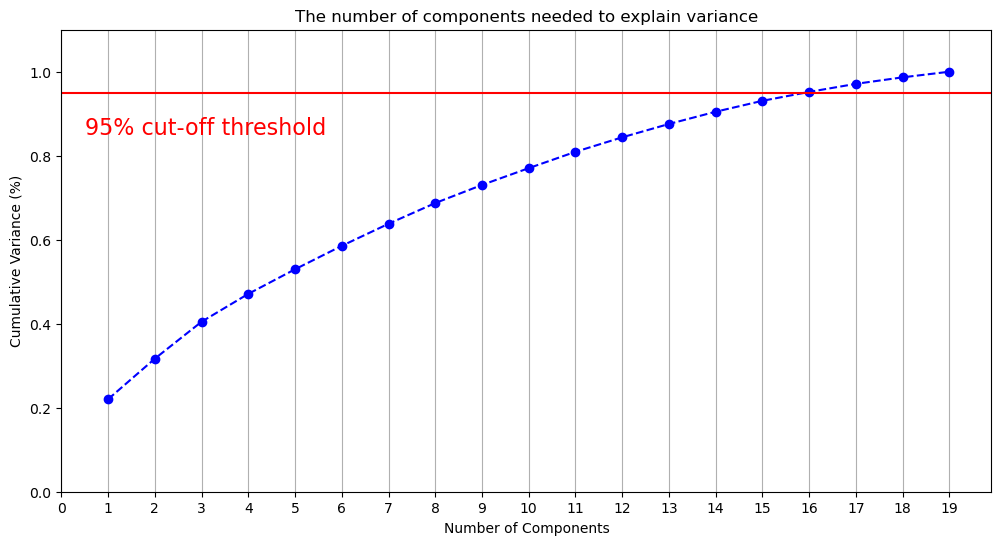

In [29]:
U, s, Vh = np.linalg.svd(data_scaled, full_matrices=False)

# Menghitung varians yang dijelaskan oleh setiap komponen utama
variances = (s ** 2) / np.sum(s ** 2)

# Menghitung kumulatif varians
cumulative_variances = np.cumsum(variances)

# Jumlah komponen
n_components = len(variances)

# Membuat array xi dengan panjang yang sesuai
xi = np.arange(1, n_components + 1, step=1)

plt.rcParams["figure.figsize"] = (12, 6)

# Plot kumulatif varians
plt.plot(xi, cumulative_variances, marker='o', linestyle='--', color='b')
plt.ylim(0.0, 1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, n_components + 1, step=1))
plt.ylabel('Cumulative Variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color='red', fontsize=16)
plt.grid(axis='x')
plt.show()

# Proses Reduksi Dimensi

In [30]:
# proses reduksi dimensi
from sklearn.decomposition import PCA 
pca = PCA(n_components=16)
X_data = pca.fit_transform(data_scaled)
X_data

array([[-1.8955946 ,  1.6213524 , -0.50116317, ..., -0.50715385,
         0.05378207, -0.8228441 ],
       [-0.4777977 ,  1.26783301, -0.25483197, ..., -0.39485919,
        -0.09454216, -0.39821773],
       [-1.09069707, -0.47309673,  0.01266823, ..., -0.46936779,
         0.01581725, -0.41404648],
       ...,
       [ 1.16862132,  2.39736364, -0.30824707, ...,  0.16825532,
        -0.19094297,  0.3627186 ],
       [ 1.59090668,  0.0695077 , -1.82086299, ...,  1.10004835,
        -0.09715079, -0.88660302],
       [ 1.90604155, -1.93289356, -1.68692427, ..., -0.63109748,
         0.30991185,  0.19540368]])

# Penentuan Cluster optimal dari WCSS

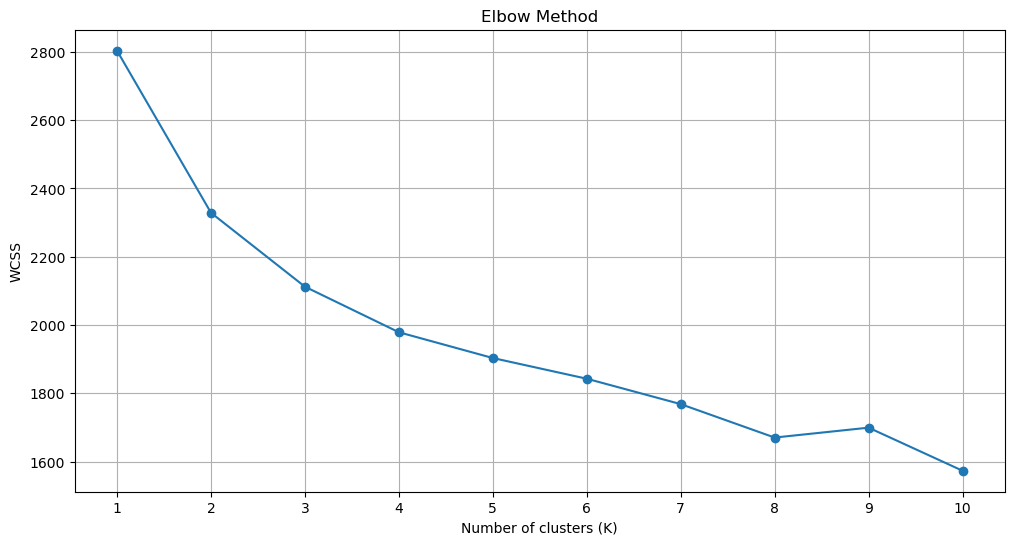

In [31]:
def kmeans_scratch(data, k, max_iters=100):
    # Inisialisasi centroid secara acak
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Hitung jarak antara setiap titik data dan centroid
        distances = np.array([np.linalg.norm(data - centroid, axis=1) for centroid in centroids])
        
        # Tetapkan setiap titik data ke cluster yang memiliki centroid terdekat
        labels = np.argmin(distances, axis=0)
        
        # Simpan centroid lama untuk perbandingan
        old_centroids = centroids.copy()
        
        # Perbarui posisi centroid dengan mengambil rata-rata dari semua titik data dalam setiap cluster
        for i in range(k):
            cluster_points = data[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = np.mean(cluster_points, axis=0)
        
        # Cek konvergensi
        if np.allclose(old_centroids, centroids):
            break
            
    # Menghitung inersia (WCSS)
    wcss = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[labels == i]
        wcss += np.sum((cluster_points - centroid) ** 2)
            
    return wcss

# Hitung inersia (WCSS) untuk berbagai nilai K
max_clusters = 10
wcss_values = []

for k in range(1, max_clusters+1):
    wcss = kmeans_scratch(X_data, k)
    wcss_values.append(wcss)

# Plot nilai WCSS untuk setiap K
plt.plot(range(1, max_clusters+1), wcss_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters+1))
plt.grid(True)
plt.show()

# Pelabelan CLuster dan Centroid

In [42]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def assign_clusters(X, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for x in X:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(x)
    return clusters

def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        new_centroids.append(np.mean(cluster, axis=0))
    return new_centroids

def kmeans(X, n_clusters, max_iter=300):
    # Inisialisasi centroid secara acak
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    
    for _ in range(max_iter):
        # Menghitung cluster
        clusters = assign_clusters(X, centroids)
        
        # Memperbarui centroid
        new_centroids = update_centroids(clusters)
        
        # Memeriksa konvergensi
        if np.array_equal(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    # Mengembalikan label cluster
    labels = np.zeros(len(X), dtype=int)
    for i, cluster in enumerate(clusters):
        for x in cluster:
            labels[np.where((X == x).all(axis=1))] = i
            
    return labels, centroids


# Pilih jumlah cluster
n_clusters = 4

# Melakukan klastering menggunakan K-Means
labels, centroids = kmeans(X_data, n_clusters)

# Menampilkan hasil klastering
print("Cluster labels:", labels)
print("\nCentroids:", centroids)

Cluster labels: [1 3 1 1 1 1 2 1 1 1 3 2 1 1 1 0 1 1 1 3 1 3 1 1 1 1 3 2 3 1 2 1 1 1 1 1 2
 3 1 0 1 1 1 1 1 1 1 2 1 3 1 1 1 1 1 1 1 1 3 2 1 1 0 3 1 1 1 0 1 1 1 3 1 3
 1 1 2 1 3 1 1 1 1 2 2 3 2 0 0 3 2 0 1 1 2 3 2 3 1 3 0 1 2 0 0 1 0 2 3 0 2
 2 1 2 1 2 1 1 2 3 3 0 1 2 2 3 0 0 0 0 1 0 2 2 2 0 3 2 0 1 0 0 2 2 0 1 0 2
 1 1 0 2 3 2 0]

Centroids: [array([ 3.22601031, -1.24911209, -0.05052176,  0.04155582, -0.70549047,
        0.15848007, -0.15783037,  0.22546355, -0.09993777,  0.27279591,
        0.06624044, -0.10713157, -0.23219115, -0.11892221, -0.05345233,
       -0.0348058 ]), array([-1.68518551e+00, -4.73354399e-01,  9.00150737e-02,  2.89023515e-02,
        1.70495497e-02,  6.24248730e-02, -2.14137115e-02, -2.33334441e-02,
        2.86364287e-02,  7.01895226e-03,  3.43247417e-02, -2.50796391e-02,
        1.05582075e-01,  5.09309469e-02, -8.08455336e-04, -1.50697788e-02]), array([ 9.63899101e-01,  5.17641550e-01, -2.73355699e-01, -1.68704841e-01,
        1.00653771e+00,  3.51142134e-01,

# Scatter Plot Clustering

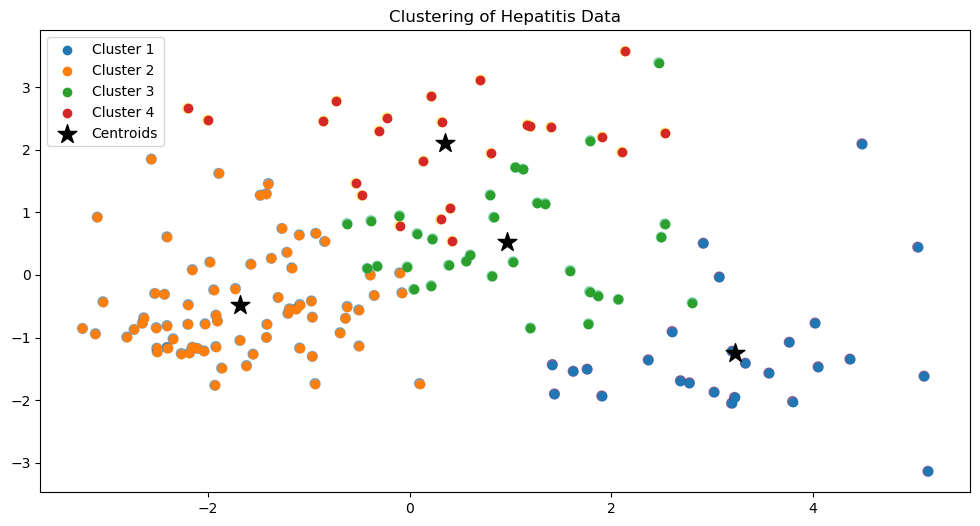

In [52]:
# Melanjutkan dengan kode visualisasi
plt.scatter(X_data[:, 0], X_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)

# Menambahkan keterangan untuk setiap klaster
for i in range(n_clusters):
    plt.scatter(X_data[labels == i, 0], X_data[labels == i, 1], label=f'Cluster {i+1}')

# Menambahkan centroid dengan simbol '*'
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=200, label='Centroids')

plt.title('Clustering of Hepatitis Data')
plt.legend()
plt.show()

# Silhouette Coefficient

In [43]:
def calculate_silhouette_coefficient(X, labels):
    n_samples = len(X)
    silhouette_scores = np.zeros(n_samples)
    
    for i in range(n_samples):
        # Hitung rata-rata jarak intra-cluster (a)
        cluster_label = labels[i]
        cluster_points = X[labels == cluster_label]
        a = np.mean([euclidean_distance(X[i], x) for x in cluster_points if not np.array_equal(X[i], x)])
        
        # Hitung rata-rata jarak inter-cluster terdekat (b)
        b = np.min([np.mean([euclidean_distance(X[i], x) for x in X[labels == j]]) for j in range(len(np.unique(labels))) if j != cluster_label])
        
        # Hitung silhouette coefficient untuk sampel
        silhouette_scores[i] = (b - a) / max(a, b)
        
    # Rata-rata nilai silhouette coefficient untuk semua sampel
    return np.mean(silhouette_scores)

# Contoh penggunaan
silhouette_score = calculate_silhouette_coefficient(X_data, labels)
print(f'Silhouette Coefficient : {silhouette_score:.3f}')

Silhouette Coefficient : 0.165
